Importing the (Dependencies)

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus  import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import nltk

In [ ]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Package stopwords is already up-to-date!


Printing Stopwords

Data Preprocessing

In [ ]:
# Loading The dataset to pandas Dataframe
#   1 : Fake News 
#   0 : Real News
raw_data = pd.read_csv('train.csv')
raw_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
raw_data.shape

(20800, 5)

In [4]:
#raw_data.info()

In [5]:
# counting the missing values from dataset
raw_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
#replacing null values with empty string

raw_data = raw_data.fillna('')

In [7]:
#merging the author name and news title  

raw_data['content'] = raw_data['author']+ ' '+ raw_data['title']
raw_data['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [8]:
# seperating the data and label

X = raw_data.drop(columns = 'label',axis = 1)
y =raw_data['label']

In [9]:
#print(X)

Stemming (the process of reducing the words into roots words.)

In [9]:
port = PorterStemmer()     

In [10]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) 
    
    #regular expression is useful for searchinmg paragraph for text
    # sub is used for substitute the certain value 
           # used for eleminating ,.and numbers...
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    
    #it will cnvert words into list
    
    stemmed_content = [port.stem(word) for word in stemmed_content if not word in stopwords.words('english')] 
    
    # stemming is used and then stopwords are used because we dont want that words then JOIN all the words.
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content 

In [11]:
raw_data['content'] = raw_data['content'].apply(stemming)

In [13]:
#raw_data['content']

In [31]:
X = raw_data['content'].values
y = raw_data['label'].values

In [32]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


TF-IDF Vectorizor

In [13]:
#converting the textual into numerical data

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [28]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Traing and Testing The Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lm = LogisticRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
print(X_test)

  (0, 16348)	0.22583100441636614
  (0, 15186)	0.39848485655580945
  (0, 14932)	0.29893567442456387
  (0, 13473)	0.27475791963366003
  (0, 12771)	0.2883148928980967
  (0, 12305)	0.27716565528409937
  (0, 11684)	0.25367875912575993
  (0, 6565)	0.31054968535837807
  (0, 4625)	0.19641692014138545
  (0, 1465)	0.4354344005745577
  (0, 114)	0.27646465077777255
  (1, 15582)	0.1498653484999072
  (1, 14444)	0.26400020318193473
  (1, 13503)	0.4512102901935686
  (1, 13046)	0.2563994975288171
  (1, 12774)	0.2988350814382177
  (1, 10315)	0.23985909373735884
  (1, 3721)	0.37257665177690863
  (1, 809)	0.42107119803033977
  (1, 421)	0.4190032645727401
  (2, 16996)	0.10545861987603505
  (2, 15582)	0.13124949250519383
  (2, 15295)	0.10347523220532906
  (2, 13270)	0.2168795415288745
  (2, 12404)	0.376783399672724
  :	:
  (6861, 6565)	0.3105313664671413
  (6861, 2497)	0.4669896832369383
  (6861, 1337)	0.3751872634036101
  (6862, 15743)	0.36378564161340754
  (6862, 15142)	0.25928190896485054
  (6862, 14383)

Anonymous Donor Pays $2.5 Million To Release Everyone Arrested At The Dakota Access Pipelinefake (1) : ''


Real (0) : 'Russia Moves to Ban Jehovah’s Witnesses as ‘Extremist’ - The New York Times'

In [18]:
# Function to detect Fake News
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = vectorizer.transform(input_data)
    prediction = lm.predict(vectorized_input_data)
    print(prediction)
    return prediction
    # if prediction == 1:
    #     # print('Fake')
    #     return 1
    # else:
    #     # print('Real')
    #     return 0

In [19]:
fake_news_det('Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart')

[0]


array([0], dtype=int64)

Plot Confusion Matrix

In [20]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.972
Confusion matrix, without normalization


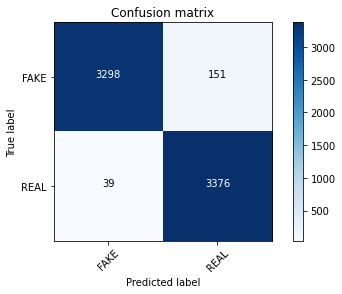

In [21]:
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [26]:
#print(predictions)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3449
           1       0.96      0.99      0.97      3415

    accuracy                           0.97      6864
   macro avg       0.97      0.97      0.97      6864
weighted avg       0.97      0.97      0.97      6864



In [23]:
user_input = input("Enter News ")
pred = fake_news_det(user_input)
if(pred==0):
    print("The News is Real")
else:
    print("The news is Fake")

[0]
The News is Real


In [24]:
import pickle

In [25]:
filename = 'news_det_model'
pickle.dump(lm,open(filename,'wb'))

In [26]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)